<a href="https://colab.research.google.com/github/HyunJW/Log_Analystic/blob/lee_feat/%EC%97%AD%EC%82%AC%EA%B1%B4%EC%B6%95%EC%A0%95%EB%B3%B4%2B%EB%85%B8%EC%9D%B8%EC%8A%B9%ED%95%98%EC%B0%A8%2B%ED%98%BC%EC%9E%A1%EB%8F%84%EB%B6%84%EC%84%9D_(%EC%A3%BC%EC%A0%9C1%2C3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2833]:
def fix_font():
  import os
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  os.system("apt-get install -y fonts-nanum")
  os.system("fc-cache -fv")
  mpl.font_manager._rebuild()
  findfont=mpl.font_manager.fontManager.findfont
  mpl.font_manager.findfont=findfont
  mpl.backends.backend_agg.findfont=findfont
  plt.rcParams["font.family"]="NanumBarunGothic"
  plt.rcParams["axes.unicode_minus"] = False


fix_font()

In [2834]:
import pandas as pd
import numpy as np
import matplotlib as mpl


In [2835]:
org=pd.read_csv("/content/서울교통공사_역사건축정보_20220831.csv", encoding="cp949")
org

,연번,호선,역명,승강장유형,길이,층수,면적,준공연도
0,1,1,서울,섬식,210,B2,10805.00,1974
1,2,1,시청,상대식,210,B2,11317.00,1974
2,3,1,종각,상대식,210,B2,10410.24,1974
3,4,1,종로3가,상대식,210,B2,9311.00,1974
4,5,1,종로5가,상대식,210,B2,10465.00,1974
...,...,...,...,...,...,...,...,...
270,271,8,남한산성입구,상대식,125,B3,5412.29,1997
271,272,8,단대오거리,상대식,125,B3,8133.22,1997
272,273,8,신흥,상대식,125,B2,4861.61,1997
273,274,8,수진,상대식,125,B2,5067.31,1997


In [2836]:
#필요한 데이터 부분만 추출
consdf=org[["호선","역명","층수","면적"]]
consdf

,호선,역명,층수,면적
0,1,서울,B2,10805.00
1,1,시청,B2,11317.00
2,1,종각,B2,10410.24
3,1,종로3가,B2,9311.00
4,1,종로5가,B2,10465.00
...,...,...,...,...
270,8,남한산성입구,B3,5412.29
271,8,단대오거리,B3,8133.22
272,8,신흥,B2,4861.61
273,8,수진,B2,5067.31


In [2837]:
#중복된 역 찾기
joong=consdf[consdf.duplicated(["역명"],keep=False)]

In [2838]:
#중복된 역 찾기
joong.역명.unique()

array(['서울', '시청', '종로3가', '동대문', '동묘앞', '신설동', '을지로3가', '을지로4가',
       '동대문역사문화공원', '신당', '왕십리', '건대입구', '잠실', '교대', '사당', '대림', '영등포구청',
       '합정', '충정로', '연신내', '불광', '충무로', '약수', '고속터미널', '가락시장', '오금', '노원',
       '삼각지', '공덕', '청구', '군자', '천호', '태릉입구'], dtype=object)

In [2839]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="서울"].sum()
consdf = consdf[consdf["역명"]!="서울"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [2840]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="시청"].sum()
consdf = consdf[consdf["역명"]!="시청"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [2841]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="종로3가"].sum()
consdf = consdf[consdf["역명"]!="종로3가"]

In [2842]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="동대문"].sum()
consdf = consdf[consdf["역명"]!="동대문"]

In [2843]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="동묘앞"].sum()
consdf = consdf[consdf["역명"]!="동묘앞"]

In [2844]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="신설동"].sum()
consdf = consdf[consdf["역명"]!="신설동"]

In [2845]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="을지로3가"].sum()
consdf = consdf[consdf["역명"]!="을지로3가"]

In [2846]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="을지로4가"].sum()
consdf = consdf[consdf["역명"]!="을지로4가"]

In [2847]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="동대문역사문화공원"].sum()
consdf = consdf[consdf["역명"]!="동대문역사문화공원"]

In [2848]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="신당"].sum()
consdf = consdf[consdf["역명"]!="신당"]

In [2849]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="왕십리"].sum()
consdf = consdf[consdf["역명"]!="왕십리"]

In [2850]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="건대입구"].sum()
consdf = consdf[consdf["역명"]!="건대입구"]

In [2851]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="잠실"].sum()
consdf = consdf[consdf["역명"]!="잠실"]

In [2852]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="교대"].sum()
consdf = consdf[consdf["역명"]!="교대"]

In [2853]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="사당"].sum()
consdf = consdf[consdf["역명"]!="사당"]

In [2854]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="대림"].sum()
consdf = consdf[consdf["역명"]!="대림"]

In [2855]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="영등포구청"].sum()
consdf = consdf[consdf["역명"]!="영등포구청"]

In [2856]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="합정"].sum()
consdf = consdf[consdf["역명"]!="합정"]

In [2857]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="충정로"].sum()
consdf = consdf[consdf["역명"]!="충정로"]

In [2858]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="연신내"].sum()
consdf = consdf[consdf["역명"]!="연신내"]

In [2859]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="불광"].sum()
consdf = consdf[consdf["역명"]!="불광"]

In [2860]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="충무로"].sum()
consdf = consdf[consdf["역명"]!="충무로"]

In [2861]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="약수"].sum()
consdf = consdf[consdf["역명"]!="약수"]

In [2862]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="고속터미널"].sum()
consdf = consdf[consdf["역명"]!="고속터미널"]

In [2863]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="가락시장"].sum()
consdf = consdf[consdf["역명"]!="가락시장"]

In [2864]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="오금"].sum()
consdf = consdf[consdf["역명"]!="오금"]

In [2865]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="노원"].sum()
consdf = consdf[consdf["역명"]!="노원"]

In [2866]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="삼각지"].sum()
consdf = consdf[consdf["역명"]!="삼각지"]

In [2867]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="공덕"].sum()
consdf = consdf[consdf["역명"]!="공덕"]

In [2868]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="청구"].sum()
consdf = consdf[consdf["역명"]!="청구"]

In [2869]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="군자"].sum()
consdf = consdf[consdf["역명"]!="군자"]

In [2870]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="천호"].sum()
consdf = consdf[consdf["역명"]!="천호"]

In [2871]:
consdf.loc[len(consdf.index)] = consdf[consdf.역명=="태릉입구"].sum()
consdf = consdf[consdf["역명"]!="태릉입구"]

In [2872]:
consdf.역명.unique()

array(['종각', '종로5가', '제기동', '청량리', '을지로입구', '상왕십리', '한양대', '뚝섬', '성수',
       '구의', '강변', '잠실나루', '잠실새내', '종합운동장', '삼성', '선릉', '역삼', '강남', '서초',
       '방배', '낙성대', '서울대입구', '봉천', '신림', '신대방', '구로디지털단지', '신도림', '문래',
       '당산', '홍대입구', '신촌', '이대', '아현', '용답', '신답', '용두', '도림천', '양천구청',
       '신정네거리', '지축', '구파발', '녹번', '홍제', '무악재', '독립문', '경복궁', '안국',
       '동대입구', '금호', '옥수', '압구정', '신사', '잠원', '남부터미널', '양재', '매봉', '도곡',
       '대치', '학여울', '대청', '일원', '수서', '경찰병원', '당고개', '상계', '창동', '쌍문',
       '수유', '미아', '미아사거리', '길음', '성신여대입구', '한성대입구', '혜화', '명동', '회현',
       '숙대입구', '신용산', '이촌', '동작', '총신대입구', '남태령', '방화', '개화산', '김포공항',
       '송정', '마곡', '발산', '우장산', '화곡', '까치산', '신정', '목동', '오목교', '양평',
       '영등포시장', '신길', '여의도', '여의나루', '마포', '애오개', '서대문', '광화문', '신금호',
       '행당', '마장', '답십리', '장한평', '아차산', '광나루', '강동', '길동', '굽은다리', '명일',
       '고덕', '상일동', '강일', '미사', '하남풍산', '하남시청', '하남검단산', '둔촌동', '올림픽공원',
       '방이', '개롱', '거여', '마천', '응암', '역촌', '독바위', '구산', '새절', '증산',
  

In [2873]:
#역명 이름 정리하기
consdf.replace({'역명': {'서울서울': "서울", "시청시청":'시청', "종로3가종로3가종로3가":'종로3가', "동대문동대문":'동대문',"동묘앞동묘앞": '동묘앞', "신설동신설동" :'신설동', "을지로3가을지로3가":'을지로3가', "을지로4가을지로4가":'을지로4가',"동대문역사문화공원동대문역사문화공원동대문역사문화공원":'동대문역사문화공원', "신당신당":'신당', "왕십리왕십리":'왕십리', "건대입구건대입구":'건대입구', "잠실잠실":'잠실', "교대교대":'교대', "사당사당":'사당', "대림대림":'대림', "영등포구청영등포구청":'영등포구청',"합정합정":'합정', "충정로충정로":'충정로', "연신내연신내":'연신내', "불광불광":'불광', "충무로충무로":'충무로', "약수약수":'약수', "고속터미널고속터미널":'고속터미널', "가락시장가락시장":'가락시장', "오금오금":'오금', "노원노원":'노원',"삼각지삼각지":'삼각지', "공덕공덕":'공덕', "청구청구":'청구', "군자군자":'군자', "천호천호":'천호', "태릉입구태릉입구":'태릉입구'}},inplace=True)

In [2874]:
#층수 찾기
consdf.층수.unique()

array(['B2', '2F', '3F', 'B3', '1F', 'B1', '2FB3', '4F', 'B4', '1FB5',
       '2FB2', 'B5', 'B6', 'B8', '1FB2', 'B3B4', 'B3B2', 'B3B3', 'B4B3',
       'B2B4', '3F1FB3', 'B4B2', 'B2B3', 'B2B5', 'B3B5', '3FB3', 'B2B3B5',
       'B2B2', '5FB2B3', 'B2B4B5'], dtype=object)

In [2875]:
#층수 깊이 단위로 통일하기
consdf.replace({'층수': {'B2':"2", '2F':"2", '3F':"3", 'B3':"3", '1F':"1", 'B1':"1", '2FB3':"5", '4F':"4", 'B4':"4", '1FB5':"6",'2FB2':"4", 'B5':"5", 'B6':"6", 'B8':"8", '1FB2':"3", 'B3B4':"4", 'B3B2':"3", 'B3B3':"3", 'B4B3':"4",'B2B4':"4", '3F1FB3':"6", 'B4B2':"4", 'B2B3':"3", 'B2B5':"5", 'B3B5':"5", '3FB3':"6", 'B2B3B5':"5",'B2B2':"2", '5FB2B3':"8", 'B2B4B5':"5"}}, inplace=True)

In [2876]:
#층수가 잘 바뀌었는지 확인
consdf.층수.unique()

array(['2', '3', '1', '5', '4', '6', '8'], dtype=object)

In [2877]:
#전처리된 데이터
finaldf=consdf[["역명","층수","면적"]]
finaldf.reset_index(drop=True, inplace=True)
finaldf

,역명,층수,면적
0,종각,2,10410.240
1,종로5가,2,10465.000
2,제기동,2,8662.000
3,청량리,2,7125.000
4,을지로입구,2,10408.660
...,...,...,...
203,단대오거리,3,8133.220
204,종로3가,5,33328.904
205,수진,2,5067.310
206,시청,3,23878.000


In [2878]:
#혼잡도 데이터와 합치기

honj=pd.read_csv("/content/서울교통공사_혼잡도_3개년도.csv", encoding="UTF8")

In [2879]:
honj.columns

Index(['Unnamed: 0', 'index', '조사연도', '조사일자', '호선', '역번호', '역명', '구분', '5시30분',
       '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분',
       '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분',
       '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분',
       '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분',
       '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분',
       '24시00분', '24시30분'],
      dtype='object')

In [2880]:
#필요한 데이터 부분 추출
honjap=honj[['역명', '5시30분',
       '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분',
       '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분',
       '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분',
       '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분',
       '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분',
       '24시00분', '24시30분']]

In [2881]:
#결측치 제거
honjap.dropna(axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [2882]:
honjap[honjap.columns[1:]] = honjap[honjap.columns[1:]].astype('float')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [2883]:
honjap=honjap.groupby(["역명"])[honjap.columns[1:]].agg('mean').round(1)

In [2884]:
honjap=honjap.reset_index()
honjap

,역명,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
0,가락시장,13.0,17.4,21.6,28.9,44.4,62.2,55.0,41.5,39.5,...,29.8,26.3,27.9,28.3,30.2,26.9,21.7,15.6,7.6,5.2
1,가산디지털단지,39.8,26.4,32.6,42.4,57.4,66.2,52.8,43.2,39.3,...,46.1,45.5,49.0,45.3,46.8,43.6,37.2,30.3,17.3,12.5
2,강남,38.7,24.2,28.9,40.4,59.6,77.1,85.9,71.8,55.0,...,57.0,54.0,67.2,78.0,88.6,67.1,51.3,33.6,24.0,15.0
3,강남구청,19.5,34.3,29.5,37.4,50.1,58.1,50.1,41.0,45.8,...,45.5,45.6,46.4,44.3,48.8,45.4,37.6,28.0,16.9,10.7
4,강동,11.4,15.2,22.8,28.3,40.9,50.9,39.0,39.5,31.7,...,21.3,21.7,19.2,21.7,20.2,20.7,18.6,12.9,5.7,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,홍제,27.7,24.1,28.4,42.4,56.1,79.1,53.9,47.0,42.8,...,33.5,31.2,30.0,31.2,31.1,32.9,26.2,18.0,13.7,8.5
241,화곡,27.4,23.2,23.3,32.1,42.6,51.7,38.7,31.3,26.8,...,21.3,19.8,18.9,19.6,22.3,18.9,16.6,12.4,8.0,5.2
242,화랑대,4.4,4.7,6.3,11.0,17.6,19.3,14.0,11.2,8.4,...,5.1,4.9,5.1,5.2,5.4,5.5,4.3,2.8,1.7,1.4
243,회현,17.1,19.1,18.7,23.0,30.5,45.8,40.6,37.1,34.2,...,32.2,34.6,35.0,36.9,43.4,34.0,30.4,22.7,13.5,6.5


In [2885]:
newset=pd.merge(finaldf,honjap, left_on='역명', right_on='역명', how='outer')
newset.dropna(axis=0, inplace=True)
newset

,역명,층수,면적,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
0,종각,2,10410.240,8.3,10.5,14.6,18.7,27.7,40.3,38.2,...,28.0,24.0,30.6,34.2,36.3,29.4,21.5,15.3,7.2,1.6
1,종로5가,2,10465.000,9.5,12.4,15.1,21.3,33.6,52.1,49.2,...,26.2,22.0,28.0,28.2,33.5,26.3,18.2,13.9,7.4,1.5
2,제기동,2,8662.000,11.9,13.8,14.4,21.3,32.5,43.8,44.3,...,18.7,18.6,21.3,24.6,27.2,22.4,15.9,10.6,5.9,4.4
3,청량리,2,7125.000,12.2,11.6,13.4,22.0,34.3,40.0,41.2,...,17.1,17.0,16.0,24.5,21.0,19.2,17.4,9.2,4.6,0.9
4,을지로입구,2,10408.660,13.4,19.8,16.1,23.9,42.3,59.8,47.4,...,42.9,39.5,42.6,48.6,52.0,47.4,39.8,33.0,14.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,남한산성입구,3,5412.290,18.0,13.0,13.8,18.7,29.2,41.2,33.4,...,14.1,13.0,13.5,12.8,14.5,13.3,10.5,8.0,4.6,3.6
203,단대오거리,3,8133.220,14.9,9.6,9.6,13.0,19.5,29.5,24.3,...,10.0,8.9,9.4,9.0,10.2,8.8,7.1,5.2,3.2,2.1
204,종로3가,5,33328.904,13.7,16.8,19.8,29.8,42.4,57.8,51.9,...,32.2,29.4,32.9,33.7,37.6,31.2,24.7,17.8,10.7,5.1
205,수진,2,5067.310,12.8,6.6,7.0,8.2,11.3,19.1,14.0,...,6.6,5.9,6.0,6.5,7.1,5.5,4.3,3.4,2.2,0.6


In [2886]:
newset2=newset[["역명","층수","면적"]]

In [2887]:
newset.iloc[:,[40]]

,24시00분
0,7.2
1,7.4
2,5.9
3,4.6
4,14.8
...,...
202,4.6
203,3.2
204,10.7
205,2.2


In [2888]:
newset2["운영시간내 혼잡도"]=newset.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]].mean(axis=1).round(1)

<ipython-input-2888-1dda38ccdd06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset2["운영시간내 혼잡도"]=newset.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]].mean(axis=1).round(1)


In [2889]:
newset2["출근시간대 혼잡도"]=newset.iloc[:,[6,7,8,9,10,11,12]].mean(axis=1).round(1)

<ipython-input-2889-38ccebd1b424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset2["출근시간대 혼잡도"]=newset.iloc[:,[6,7,8,9,10,11,12]].mean(axis=1).round(1)


In [2890]:
newset2["퇴근시간대 혼잡도"]=newset.iloc[:,[26,27,28,29,30,31,32]].mean(axis=1).round(1)

<ipython-input-2890-636b73cd4190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset2["퇴근시간대 혼잡도"]=newset.iloc[:,[26,27,28,29,30,31,32]].mean(axis=1).round(1)


In [2891]:
newset2

,역명,층수,면적,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,종각,2,10410.240,30.8,29.8,46.4
1,종로5가,2,10465.000,31.7,35.3,44.5
2,제기동,2,8662.000,26.3,31.5,35.7
3,청량리,2,7125.000,23.1,29.9,31.4
4,을지로입구,2,10408.660,40.0,38.1,58.3
...,...,...,...,...,...,...
202,남한산성입구,3,5412.290,17.3,26.3,21.6
203,단대오거리,3,8133.220,12.7,18.8,14.8
204,종로3가,5,33328.904,35.7,41.2,50.0
205,수진,2,5067.310,9.0,11.8,10.4


In [2892]:
newset2[newset2.columns[1:]] = newset2[newset2.columns[1:]].astype('float')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [2893]:
newset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 206
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   역명         199 non-null    object 
 1   층수         199 non-null    float64
 2   면적         199 non-null    float64
 3   운영시간내 혼잡도  199 non-null    float64
 4   출근시간대 혼잡도  199 non-null    float64
 5   퇴근시간대 혼잡도  199 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.9+ KB


In [2894]:
corr_matrix=newset2.corr()
corr_matrix

,층수,면적,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
층수,1.000000,0.501029,-0.060195,-0.071094,-0.020312
면적,0.501029,1.000000,0.101477,0.056930,0.123209
운영시간내 혼잡도,-0.060195,0.101477,1.000000,0.961757,0.986186
출근시간대 혼잡도,-0.071094,0.056930,0.961757,1.000000,0.932373
퇴근시간대 혼잡도,-0.020312,0.123209,0.986186,0.932373,1.000000


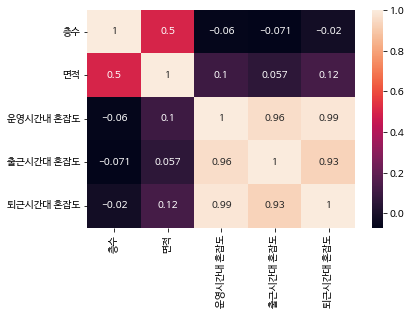

In [2895]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [2896]:
df1=pd.read_csv("/content/역별 월별 노인 승하차인원_20191231.csv", encoding="cp949")

In [2897]:
df1["합계"]=df1.iloc[:,4:].sum(axis=1)

In [2898]:
newdf1=df1[["역명","구분","합계"]]
newdf1=newdf1[newdf1["구분"]!="하차"]
newdf1.drop(['구분'], axis=1,inplace=True)
newdf1[newdf1.columns[1:]] = newdf1[newdf1.columns[1:]].astype('float')
newdf1

,역명,합계
0,서울역,2091960.0
2,시청,1118281.0
4,종각,1653008.0
6,종로3가,3972545.0
8,종로5가,2926950.0
...,...,...
540,남한산성입구(성남법원.검찰청),769622.0
542,단대오거리,656667.0
544,신흥,424513.0
546,수진,492646.0


In [2899]:
df2=pd.read_csv("/content/역별 월별 노인 승하차인원_20201231.csv", encoding="cp949")

In [2900]:
df2["합계"]=df2.iloc[:,4:].sum(axis=1)

In [2901]:
newdf2=df2[["역명","구분","합계"]]
newdf2=newdf2[newdf2["구분"]!="하차"]
newdf2.drop(['구분'], axis=1,inplace=True)
newdf2[newdf2.columns[1:]] = newdf2[newdf2.columns[1:]].astype('float')
newdf2

,역명,합계
0,서울역,1391862.0
2,시청,592974.0
4,종각,1062297.0
6,종로3가,2554908.0
8,종로5가,2183302.0
...,...,...
550,남한산성입구,600218.0
552,단대오거리,505520.0
554,신흥,310474.0
556,수진,335197.0


In [2902]:
df3=pd.read_csv("/content/역별 월별 노인 승하차인원_20211231.csv", encoding="cp949")
df3

,연번,호선,역번호,역명,구분,2021년1월,2021년2월,2021년3월,2021년4월,2021년5월,2021년6월,2021년7월,2021년8월,2021년9월,2021년10월,2021년11월,2021년12월
0,1,1,150,서울역,승차,96145.0,96348.0,128841.0,129618.0,126996.0,130131.0,115976.0,112574.0,117336.0,140544.0,142590.0,123773.0
1,2,1,150,서울역,하차,89987.0,90123.0,121362.0,122614.0,120488.0,123525.0,109893.0,107251.0,112294.0,134782.0,135422.0,116706.0
2,3,1,151,시청,승차,35764.0,36928.0,49878.0,49686.0,47164.0,48723.0,44137.0,43505.0,44951.0,53922.0,58352.0,52404.0
3,4,1,151,시청,하차,33840.0,35192.0,48518.0,48051.0,47078.0,48728.0,42906.0,42220.0,44145.0,54413.0,58588.0,52199.0
4,5,1,152,종각,승차,67225.0,71667.0,91828.0,88536.0,88797.0,90465.0,83938.0,83341.0,81862.0,91964.0,97337.0,95087.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,562,8,2826,수진,하차,24138.0,23815.0,30037.0,29425.0,28471.0,28978.0,28089.0,27662.0,27586.0,29327.0,31198.0,30514.0
562,563,8,2827,모란,승차,28612.0,29587.0,40385.0,41132.0,39473.0,39184.0,34435.0,34534.0,36976.0,41210.0,40244.0,37425.0
563,564,8,2827,모란,하차,21487.0,22646.0,31446.0,32505.0,30959.0,30825.0,27729.0,27888.0,29985.0,33393.0,31931.0,29085.0
564,565,8,2828,남위례,승차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6178.0


In [2903]:
df3["합계"]=df3.iloc[:,5:].sum(axis=1)

In [2904]:
newdf3=df3[["역명","구분","합계"]]
newdf3=newdf3[newdf3["구분"]!="하차"]

In [2905]:
newdf3


,역명,구분,합계
0,서울역,승차,1460872.0
2,시청,승차,565414.0
4,종각,승차,1032047.0
6,종로3가,승차,2489647.0
8,종로5가,승차,2303767.0
...,...,...,...
556,단대오거리,승차,562345.0
558,신흥,승차,306458.0
560,수진,승차,339066.0
562,모란,승차,443197.0


In [2906]:
newdf3.drop(['구분'], axis=1,inplace=True)
newdf3[newdf3.columns[1:]] = newdf3[newdf3.columns[1:]].astype('float')
newdf3

,역명,합계
0,서울역,1460872.0
2,시청,565414.0
4,종각,1032047.0
6,종로3가,2489647.0
8,종로5가,2303767.0
...,...,...
556,단대오거리,562345.0
558,신흥,306458.0
560,수진,339066.0
562,모란,443197.0


In [2907]:
df4=pd.read_csv("/content/역별 월별 노인 승하차인원_20220831.csv", encoding="cp949")
df4=df4[df4["승하차구분"]!="하차"]

In [2908]:
df4=df4.groupby(["역명"])[df4.columns[1:]].agg('sum')
df4.reset_index(inplace=True)
df4

,역명,호선,고유역번호(외부역코드),승하차인원수
0,가락시장,88,25264,847900
1,가산디지털단지,56,21984,472848
2,강남,16,1776,982842
3,강남구청,56,21856,304688
4,강동,40,20392,653186
...,...,...,...,...
234,홍제,24,2512,871536
235,화곡,40,20144,865313
236,화랑대(서울여대입구),48,21176,276001
237,회현(남대문시장),32,3400,1171377


In [2909]:
df4.drop(['호선'], axis=1,inplace=True)

In [2910]:
df4.drop(['고유역번호(외부역코드)'], axis=1,inplace=True)

In [2911]:
df4[df4.columns[1:]] = df4[df4.columns[1:]].astype('float')
df4

,역명,승하차인원수
0,가락시장,847900.0
1,가산디지털단지,472848.0
2,강남,982842.0
3,강남구청,304688.0
4,강동,653186.0
...,...,...
234,홍제,871536.0
235,화곡,865313.0
236,화랑대(서울여대입구),276001.0
237,회현(남대문시장),1171377.0


In [2912]:
df4[df4["역명"]=="서울역"]

,역명,승하차인원수
118,서울역,1305509.0


In [2913]:
df4.columns=["역명","합계"]
newdf4=df4

In [2914]:
newset3=newset2
newset3.drop(["층수"], axis=1,inplace=True)
newset3.drop(["면적"], axis=1,inplace=True)
newset3

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,역명,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,종각,30.8,29.8,46.4
1,종로5가,31.7,35.3,44.5
2,제기동,26.3,31.5,35.7
3,청량리,23.1,29.9,31.4
4,을지로입구,40.0,38.1,58.3
...,...,...,...,...
202,남한산성입구,17.3,26.3,21.6
203,단대오거리,12.7,18.8,14.8
204,종로3가,35.7,41.2,50.0
205,수진,9.0,11.8,10.4


In [2915]:
df3[df3["역명"]=="서울역"]

,연번,호선,역번호,역명,구분,2021년1월,2021년2월,2021년3월,2021년4월,2021년5월,2021년6월,2021년7월,2021년8월,2021년9월,2021년10월,2021년11월,2021년12월,합계
0,1,1,150,서울역,승차,96145.0,96348.0,128841.0,129618.0,126996.0,130131.0,115976.0,112574.0,117336.0,140544.0,142590.0,123773.0,1460872.0
1,2,1,150,서울역,하차,89987.0,90123.0,121362.0,122614.0,120488.0,123525.0,109893.0,107251.0,112294.0,134782.0,135422.0,116706.0,1384447.0
222,223,4,426,서울역,승차,18895.0,19143.0,24517.0,24491.0,23354.0,24122.0,22915.0,22614.0,22876.0,25607.0,26551.0,24308.0,279393.0
223,224,4,426,서울역,하차,20951.0,21450.0,28109.0,28393.0,27737.0,28708.0,25622.0,24976.0,26371.0,31926.0,33865.0,28986.0,327094.0


In [2916]:
newset3

,역명,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,종각,30.8,29.8,46.4
1,종로5가,31.7,35.3,44.5
2,제기동,26.3,31.5,35.7
3,청량리,23.1,29.9,31.4
4,을지로입구,40.0,38.1,58.3
...,...,...,...,...
202,남한산성입구,17.3,26.3,21.6
203,단대오거리,12.7,18.8,14.8
204,종로3가,35.7,41.2,50.0
205,수진,9.0,11.8,10.4


In [2917]:
newdf1=newdf1.reset_index()
newdf1.drop(["index"], axis=1,inplace=True)
newdf1.columns=["역명","합계2019"]
newdf1

,역명,합계2019
0,서울역,2091960.0
1,시청,1118281.0
2,종각,1653008.0
3,종로3가,3972545.0
4,종로5가,2926950.0
...,...,...
270,남한산성입구(성남법원.검찰청),769622.0
271,단대오거리,656667.0
272,신흥,424513.0
273,수진,492646.0


In [2918]:
newdf1=newdf1.groupby(["역명"])[newdf1.columns[1:]].agg('sum')
newdf1.reset_index(inplace=True)

In [2919]:
newdf2=newdf2.reset_index()
newdf2.drop(["index"], axis=1,inplace=True)
newdf2.columns=["역명","합계2020"]
newdf2=newdf2.groupby(["역명"])[newdf2.columns[1:]].agg('sum')
newdf2.reset_index(inplace=True)
newdf2

,역명,합계2020
0,가락시장,1146400.0
1,가산디지털단지,585143.0
2,강남,1328004.0
3,강남구청,364878.0
4,강동,800006.0
...,...,...
240,홍제,1155546.0
241,화곡,1089105.0
242,화랑대,343065.0
243,회현,1369531.0


In [2920]:
newdf3=newdf3.reset_index()
newdf3.drop(["index"], axis=1,inplace=True)
newdf3.columns=["역명","합계2021"]
newdf3=newdf3.groupby(["역명"])[newdf3.columns[1:]].agg('sum')
newdf3.reset_index(inplace=True)
newdf3

,역명,합계2021
0,가락시장,1176114.0
1,가산디지털단지,664754.0
2,강남,1391760.0
3,강남구청,410327.0
4,강동,800637.0
...,...,...
243,홍제,1188405.0
244,화곡,1159548.0
245,화랑대,367016.0
246,회현,1508281.0


In [2921]:
newdf4=newdf4.reset_index()
newdf4.drop(["index"], axis=1,inplace=True)
newdf4.columns=["역명","합계2022"]
newdf4=newdf4.groupby(["역명"])[newdf4.columns[1:]].agg('sum')
newdf4.reset_index(inplace=True)
newdf4

,역명,합계2022
0,가락시장,847900.0
1,가산디지털단지,472848.0
2,강남,982842.0
3,강남구청,304688.0
4,강동,653186.0
...,...,...
234,홍제,871536.0
235,화곡,865313.0
236,화랑대(서울여대입구),276001.0
237,회현(남대문시장),1171377.0


In [2922]:
a=pd.merge(newdf1,newdf2,how="left", left_on="역명", right_on="역명")
a.dropna(inplace=True)
a

,역명,합계2019,합계2020
0,가락시장,1445441.0,1146400.0
1,가산디지털단지,669017.0,585143.0
2,강남,1732630.0,1328004.0
3,강남구청,484686.0,364878.0
4,강동,1087601.0,800006.0
...,...,...,...
235,혜화,1323625.0,918327.0
236,홍대입구,1062950.0,707960.0
237,홍제,1571608.0,1155546.0
238,화곡,1451661.0,1089105.0


In [2923]:
b=pd.merge(a,newdf3,how="left", left_on="역명", right_on="역명")
b.dropna(inplace=True)
b

,역명,합계2019,합계2020,합계2021
0,가락시장,1445441.0,1146400.0,1176114.0
1,가산디지털단지,669017.0,585143.0,664754.0
2,강남,1732630.0,1328004.0,1391760.0
3,강남구청,484686.0,364878.0,410327.0
4,강동,1087601.0,800006.0,800637.0
...,...,...,...,...
185,혜화,1323625.0,918327.0,982221.0
186,홍대입구,1062950.0,707960.0,746783.0
187,홍제,1571608.0,1155546.0,1188405.0
188,화곡,1451661.0,1089105.0,1159548.0


In [2928]:
c=pd.merge(b,newdf4,how="left", left_on="역명", right_on="역명")
c.dropna(inplace=True)

In [2929]:
c

,역명,합계2019,합계2020,합계2021,합계2022
0,가락시장,1445441.0,1146400.0,1176114.0,847900.0
1,가산디지털단지,669017.0,585143.0,664754.0,472848.0
2,강남,1732630.0,1328004.0,1391760.0,982842.0
3,강남구청,484686.0,364878.0,410327.0,304688.0
4,강동,1087601.0,800006.0,800637.0,653186.0
...,...,...,...,...,...
185,혜화,1323625.0,918327.0,982221.0,720440.0
186,홍대입구,1062950.0,707960.0,746783.0,534273.0
187,홍제,1571608.0,1155546.0,1188405.0,871536.0
188,화곡,1451661.0,1089105.0,1159548.0,865313.0


In [2937]:
c["노인 승하차 인원(2019-2022)"]=c.iloc[:,1:].sum(axis=1)

In [2939]:
nointotal=c[["역명","노인 승하차 인원(2019-2022)"]]
nointotal

,역명,노인 승하차 인원(2019-2022)
0,가락시장,4615855.0
1,가산디지털단지,2391762.0
2,강남,5435236.0
3,강남구청,1564579.0
4,강동,3341430.0
...,...,...
185,혜화,3944613.0
186,홍대입구,3051966.0
187,홍제,4787095.0
188,화곡,4565627.0


In [2930]:
newset3

,역명,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,종각,30.8,29.8,46.4
1,종로5가,31.7,35.3,44.5
2,제기동,26.3,31.5,35.7
3,청량리,23.1,29.9,31.4
4,을지로입구,40.0,38.1,58.3
...,...,...,...,...
202,남한산성입구,17.3,26.3,21.6
203,단대오거리,12.7,18.8,14.8
204,종로3가,35.7,41.2,50.0
205,수진,9.0,11.8,10.4


In [2940]:
finalcrr=pd.merge(nointotal,newset3,how="left", left_on="역명", right_on="역명")
finalcrr.dropna(inplace=True)
finalcrr

,역명,노인 승하차 인원(2019-2022),운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,가락시장,4615855.0,31.1,42.8,45.4
2,강남,5435236.0,59.1,61.8,80.7
4,강동,3341430.0,25.0,36.9,30.2
6,개롱,1494813.0,12.7,18.9,14.1
7,개화산,1111252.0,4.0,5.4,4.7
...,...,...,...,...,...
173,혜화,3944613.0,54.1,61.6,69.7
174,홍대입구,3051966.0,39.7,46.3,48.0
175,홍제,4787095.0,38.3,51.1,48.6
176,화곡,4565627.0,24.4,34.9,29.0


In [2941]:
corr_matrix2=finalcrr.corr()
corr_matrix2

,노인 승하차 인원(2019-2022),운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
노인 승하차 인원(2019-2022),1.000000,0.198788,0.170659,0.162350
운영시간내 혼잡도,0.198788,1.000000,0.962847,0.988309
출근시간대 혼잡도,0.170659,0.962847,1.000000,0.938375
퇴근시간대 혼잡도,0.162350,0.988309,0.938375,1.000000


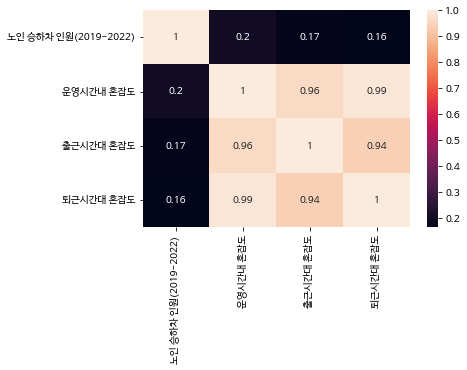

In [2942]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix2, annot=True)
plt.show()